<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Find-mriqc-output-files" data-toc-modified-id="Find-mriqc-output-files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find mriqc output files</a></span><ul class="toc-item"><li><span><a href="#Check-to-see-if-all-output-files-have-ratings" data-toc-modified-id="Check-to-see-if-all-output-files-have-ratings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Check to see if all output files have ratings</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-of-all-scan-ratings" data-toc-modified-id="Create-dataframe-of-all-scan-ratings-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Create dataframe of all scan ratings</a></span></li></ul></li><li><span><a href="#Filter-Scans" data-toc-modified-id="Filter-Scans-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Filter Scans</a></span><ul class="toc-item"><li><span><a href="#Ratings-of-acceptable-or-better" data-toc-modified-id="Ratings-of-acceptable-or-better-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Ratings of acceptable or better</a></span></li><li><span><a href="#Ratings-of-poor-or-better" data-toc-modified-id="Ratings-of-poor-or-better-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Ratings of poor or better</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import os
import glob

__Set Project Directory__

In [3]:
proj_dir = "/Users/tuk12127/OneDrive - Temple University/olson_lab/projects/social_doors/"
os.chdir(proj_dir)

## Find mriqc output files

In [4]:
# Find all mriqc json files
#mriqc_output = glob.glob('preprocessing/mriqc/*.html')
#json_files = glob.glob('preprocessing/mriqc/*.json')

### Check to see if all output files have ratings

In [5]:
"""for f in mriqc_output:
    json_search = f[:-5]+'.json'
    if os.path.isfile(json_search):
        continue
    else:
        print(json_search+" does not exist")"""

'for f in mriqc_output:\n    json_search = f[:-5]+\'.json\'\n    if os.path.isfile(json_search):\n        continue\n    else:\n        print(json_search+" does not exist")'

#### Create dataframe of all scan ratings
This dataframe will have columns for the subject ID, the run name, the rating of that run, and any artifacts that were noted

In [6]:
"""
subj_mriqc_df = pd.DataFrame()

for j in json_files:
    temp_subj = j.split("/")[2][:7]
    temp_df = pd.read_json(j, lines=True)
    temp_df.columns = ['subject', 'run', 'rating', 'artifacts']
    temp_df['subject'] = temp_subj
    subj_mriqc_df = subj_mriqc_df.append(temp_df)

subj_mriqc_df['run'] = subj_mriqc_df['run'].str.replace('run-0010', 'run-010')
subj_mriqc_df = subj_mriqc_df.sort_values(['subject', 'run'])
subj_mriqc_df = subj_mriqc_df.reset_index(drop=True)
subj_mriqc_df.to_csv('preprocessing/mriqc/mriqc_summary.csv', encoding='utf-8')
"""

'\nsubj_mriqc_df = pd.DataFrame()\n\nfor j in json_files:\n    temp_subj = j.split("/")[2][:7]\n    temp_df = pd.read_json(j, lines=True)\n    temp_df.columns = [\'subject\', \'run\', \'rating\', \'artifacts\']\n    temp_df[\'subject\'] = temp_subj\n    subj_mriqc_df = subj_mriqc_df.append(temp_df)\n\nsubj_mriqc_df[\'run\'] = subj_mriqc_df[\'run\'].str.replace(\'run-0010\', \'run-010\')\nsubj_mriqc_df = subj_mriqc_df.sort_values([\'subject\', \'run\'])\nsubj_mriqc_df = subj_mriqc_df.reset_index(drop=True)\nsubj_mriqc_df.to_csv(\'preprocessing/mriqc/mriqc_summary.csv\', encoding=\'utf-8\')\n'

In [7]:
#j.split("/")

### Filter Scans

#### Ratings of acceptable or better

In [27]:
subj_mriqc_df = pd.read_csv(proj_dir+'/misc/qc_summary.csv')

subj_mriqc_df_accp = subj_mriqc_df[subj_mriqc_df['rating'] > 2]

subj_mriqc_df_accp['artifacts'] = subj_mriqc_df_accp['artifacts'].fillna('[]')

subj_mriqc_df_accp = subj_mriqc_df_accp[~subj_mriqc_df_accp['artifacts'].str.contains('cerebellum-cutoff')]

/Users/tuk12127/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


count    64.000000
mean      3.609375
std       0.681203
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: subject, dtype: float64

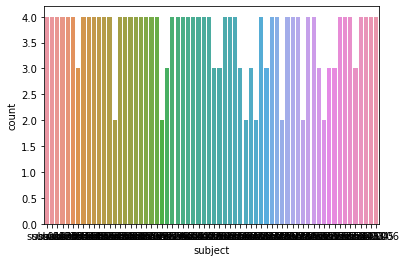

In [28]:
# Drop scans that were rated worse than adequate
#subj_mriqc_df_accp = subj_mriqc_df[subj_mriqc_df['rating'] > 2]

# Drop rows with T1 scans
#subj_mriqc_df_accp.drop(subj_mriqc_df_accp[subj_mriqc_df_accp['run'].str.contains('T1w')].index, 
#                      inplace = True) 

#subj_mriqc_df_accp.to_csv('preprocessing/mriqc/mriqc_summary_accp.csv')



# Print info about the subjects
sns.countplot(data=subj_mriqc_df_accp, x='subject')
subj_mriqc_df_accp['subject'].value_counts().describe()

In [29]:
# Import subject list with group ids
participants_df = pd.read_csv(proj_dir+'/participants.tsv', sep='\t')
participants_df

participants_df_good = participants_df[participants_df['participant_id'].isin(list(subj_mriqc_df_accp['subject'].unique()))]
participants_df_good['group'].value_counts()
participants_df_good.to_csv(proj_dir+'/misc/participants_good.tsv', sep='\t')


The above table and figure shows the number of subjects in this dataset at the current threshold and information about the number of runs per each subject.

#### Ratings of poor or better

count    36.000000
mean      9.055556
std       1.722862
min       4.000000
25%       8.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: subject, dtype: float64

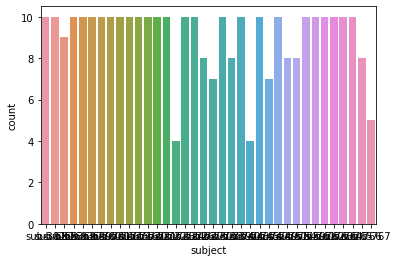

In [21]:
# Drop scans that were rated worse than adequate
subj_mriqc_df_poor = subj_mriqc_df[subj_mriqc_df['rating'] > 1]

# Drop rows with T1 scans
subj_mriqc_df_poor.drop(subj_mriqc_df_poor[subj_mriqc_df_poor['run'].str.contains('T1w')].index, 
                      inplace = True) 

subj_mriqc_df_poor.to_csv('preprocessing/mriqc/mriqc_summary_poor.csv')

# Print number of subjects after exclusions
sns.countplot(data=subj_mriqc_df_poor, x='subject')
subj_mriqc_df_poor['subject'].value_counts().describe()